# Factor Analysis
## MCBDD Homework 3

#### Definition

Factor analysis is a statistical method used to uncover the underlying relationships between observed variables. Its main objective is to explain the variance and covariance among a set of observed variables through a smaller number of unobserved variables, known as factors.

These unobserved factors are inferred from the relationships between the observed variables rather than being directly measured. Instead of using a discrete latent variable, factor analysis employs a continuous latent variable to influence the observed data.

The technique aims to understand how the observed variables vary by analyzing their changes in values. Through this analysis, it is possible to identify the underlying factors that account for these patterns.

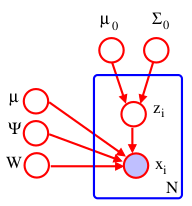

The figure above summarizes the model of factor analysis. The figures shows a continuous latent variable $z_i$ which is a k-dimensional vector drawn from a normal distribution with mean $\mu_0 $ and covariance matrix $\Sigma_0$. Then the observation x is chosen based on the latent representation of $z_i$ where x is additionally parameterized by a mean, a covariance function $\Psi$ and a factor loading matrix W

**Relationship between covariance matrix, factor analysis and principal component analysis.**

$p(x_i|z_i, \theta) = \mathcal{N}(Wz_i + \mu,\Psi)$

Conditioned on the latent vector z and all the other parameters $\theta$ the probability distribution of an observed x is a normal distribution with a mean that is a linear function of the latent vector plus an intercept $\mu$ and the covariance matrix $\Psi$

When the covariance matrix is chosen to be a diagonal matrix, which means there is no covariation in the individual coefficients of x conditioned on the latent vector, then we basically force the latent vector or variable z to explain the correlation. This is because there is no part of the correlation which can be explained without the latent z. So everything that correlates the individual components of x must come from the latent variable.

PCA uses the covariance matrix to identify principal components that maximize variance for dimensionality reduction. In the case of PCA the covariance matrix chosen is a scaled Identity matrix. i.e. $\Psi = \sigma^2I$.

The PCs represent the directions of greatest variance in the data.
The first principal component explains the most variance, and subsequent components explain progressively less variance.
Unlike factor analysis,

PCA is often used for dimensionality reduction, where the first few PCs capture most of the information, allowing for data compression and visualization in lower dimensions.  Factor analysis focuses on unobserved latent factors and explaining the underlying structure of the data, while PCA focuses on linear combinations of the observed variables, not necessarily the unobserved factors.

**Factor Loadings** 

These are coefficients that express the relationship between each observed variable and the underlying factors. They indicate how much of the variance in an observed variable is explained by a factor.

Factor loadings are typically represented as a matrix, where rows correspond to observed variables and columns correspond to factors.
The value at each cell (i, j) in the matrix represents the factor loading of the i-th observed variable on the j-th factor.
A high positive loading (close to 1) indicates that the observed variable is strongly influenced by the factor.
A high negative loading (close to -1) suggests the observed variable is negatively related to the factor (increases when the factor decreases and vice versa).
A value close to zero indicates little to no influence of the factor on the observed variable.

**Why factors are orthogonal to each other**

In PCA, given n data points in p dimensions, the n observations are organized as rows of the matrix X. In reducing the dimensionality from p to a smaller k, we choose k directions and project down the original high dimensional objects into a lower dimensional latent space. 
The k projection directions are encoded as columns of the matrix W, W = [$w_1, w_2, ..., w_k] \in \mathbb{R}^{p\times k}$

Projecting x down to $z = (z_1,...,z_k)^t = W^tx$

The projection matrix W serves two functions of encoding and decoding. The projection directions encode an object into a latent vector by multiplying each input object with the transpose of the W matrix ($z = W^tx$). This gives a latent representation, and the j-th component of the k-directional latent representation is a projection of x into the j direction. 

This requires orthonomality which means that any pair of projection directions is orthogonal to each other and length of projection vectors is 1 ($W^tW = I$)
 
 
However, when factors are orthogonal, the variance of an observed variable can be explained by a single factor without any "interference" from other factors. This makes it easier to understand what each factor represents and how it influences the observed variables.

**Generative Process**

Using an example of k = 1 (1 dimensional latent space), p = 2 (2 dimensional x), diagonal $\Psi$ covariance matrix

The generative process starts by defining a prior distribution on the one dimensional continuous variable z as a normal distribution. Then the mean of the 2d variable x is constructed as a linear function of the latent variable z plus the intercept term which is the mean vector ($wz_i + \mu$) 

The statement above means that we take an isotropic Gaussian "spray can" and slide it along the 1d line generated by the function ($wz_i + \mu$). We end up with a correlated Gaussian distribution in the $x_1, x_2$ space.

In other words, we sample latent variable z and then we combine z in a linear function to define the mean  of variable x. We finally arrive at a correlated distribution where now the correlation between $x_1$ and $x_2$ is only explained by how the mean of x expressed as a linear function of the latent variable varies. The variation of the mean is interpreted as the sliding of the Gaussian spray can along the 1d line. 

**Relationship between PCA and autoencoders.**

PCA and Autoencoders both serve the purpose of dimensional reduction of data while preserving important information. Whereas PCA is a linear method suitable for data with linear relationships, while autoencoders can model non-linear relationships and are more flexible but require more resources.

In the process of training data PCA involves solving an eigenvalue problem, which is computationally efficient for small to medium-sized data while autoencoders involve training a neural network using gradient descent, which can be computationally intensive and time-consuming.

**Explanation to high-school student**

* Hidden Factors: Factor analysis helps us discover hidden factors that influence the data, not directly observe them.
* Dimensionality Reduction: It can also help simplify the data by grouping related points together, making it easier to analyze. 
* Interpretation: The most important part is understanding what these hidden factors represent and how they influence the data points.

PCA looks for the main directions in which the data varies the most. These directions are called principal components. PCA reorganizes the data along these main directions.

Imagine you have a bunch of friends and you want to take a group photo, but you only have a tiny table to stand on. It's hard to fit everyone in a normal way! PCA is like finding a clever way to arrange yourselves for the photo. Here's how it works:

Data party: PCA takes a bunch of information, like your heights, weights, and maybe even shoe sizes (all data points), and treats them like a big party.
    Finding the main trend: PCA finds the direction where most of the variation (differences) between you all lies. Think of it as the line that runs through the middle of the group, separating shorter people from taller people. This is the first "principal component."
    Squeezing in: Now, PCA imagines taking a picture where everyone is lined up along this main direction. This makes it easier to fit everyone in the tiny table-photo!
    Maybe another picture? There might be a second way to arrange yourselves for a good photo, like lining up by shoe size. PCA can find this too, if it explains a significant amount of the remaining differences.

In short, PCA helps you take a bunch of complicated information and turn it into a simpler picture by focusing on the most important trends. This is useful in many situations, from analyzing stock market data to figuring out what makes different movies successful.



**Example Program**

A Python progam to identify K principal components on the MNIST dataset.


In [1]:
# Imports

import argparse
import numpy as np
import matplotlib
import torch
import torchvision
import torch.utils.data as torch_data
import torchvision.transforms as transforms

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


def get_data(n):

    """Get data"""

    transform = transforms.Compose([transforms.ToTensor()])
    dataset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size = n, shuffle = False)

    X = next(iter(dataloader))[0].numpy()
    Y = next(iter(dataloader))[1].numpy()

    X = np.reshape(X, (n, 28, 28))

    return X, Y


In [2]:
def imshow(img):
    """Plot images"""

    plt.title(args.title)
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()
    

def plot_encoded_data(X, Y):
    
    """Plot data"""

    plt.title('PCA on MNIST for k = 2 dimension')
    plt.scatter(X[:, 0], X[:, 1], s = 12, c = Y)

    for i, txt in enumerate(Y):
        plt.annotate(txt, (X[i, 0], X[i, 1]))

    plt.show()


def plot_decoded_data(X, Y):
   
    """Plot data"""

    n_row = 5
    n_col = 5
    n = n_row * n_col

    fig, axes = plt.subplots(n_row, n_col, figsize = (1.5 * n_col, 2 * n_row))

    for i in range(n):
        ax = axes[i // n_col, i % n_col]
        ax.imshow(np.reshape(X[i], (28, 28)), cmap = 'gray')
        ax.set_title('Label: {}'.format(Y[i]))

    plt.tight_layout()
    #plt.title('Decoded MNIST from k = 2 dimensions')
    plt.show()
    

In [3]:
def init():

    # Variables
    n = 200
    k = 2

    # Load data
    X, Y = get_data(n)

    # PCA
    X = np.reshape(X, (n, 28 * 28))
    mean = np.mean(X, axis = 0)

    U, S, V = np.linalg.svd(X - mean, full_matrices = False)

    U = U[:, :k]
    S = S[:k]
    V = V[:k]

    X_enc = np.dot(X - mean, V.T)
    X_dec = np.dot(X_enc, V) + mean

    # Plot

    plot_encoded_data(X_enc, Y)
    plot_decoded_data(X_dec, Y)
    

In [4]:
init()
    

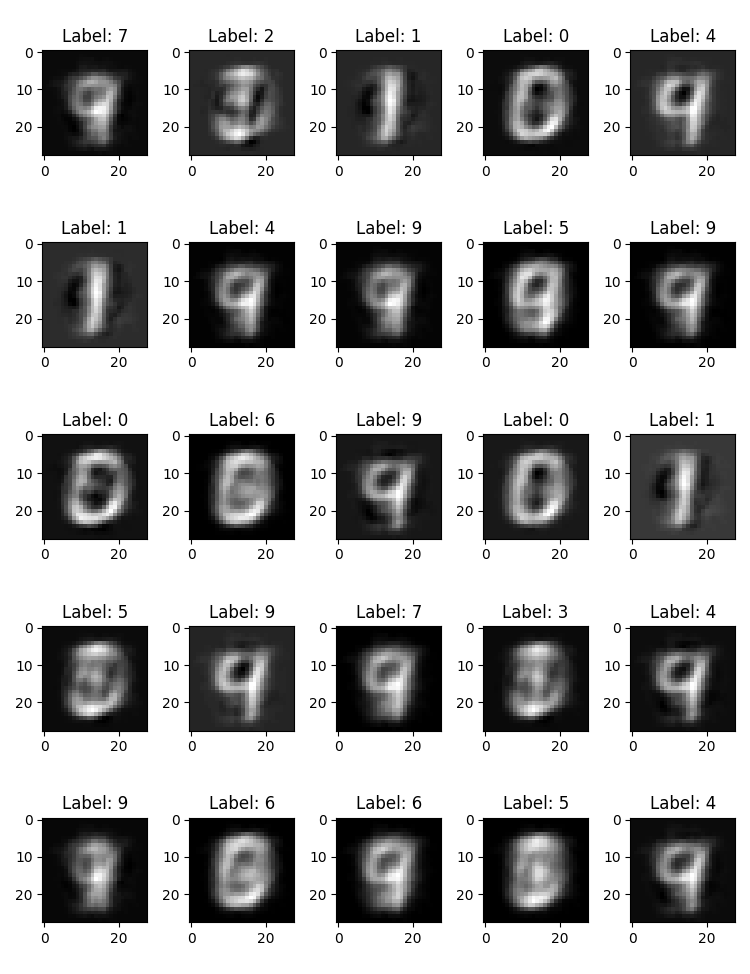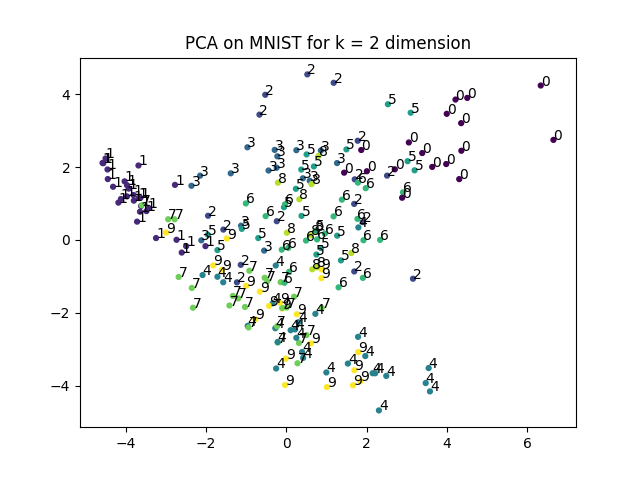